Importing Necessary Packages

In [348]:
import tarfile, urllib, os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

%matplotlib inline
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Fetching Dataset

In [349]:
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
path = os.path.join("datasets", "housing") 
filepath = os.path.join(path, "housing.tgz")

if not os.path.isdir(path):
        os.makedirs(path)
        
urllib.request.urlretrieve(url, filepath)
housing_tgz = tarfile.open(filepath)
housing_tgz.extractall(path=path)
housing_tgz.close()

Load Dataset

In [350]:
df = pd.read_csv("datasets\housing\housing.csv")
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Object dtype

In [352]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Missing Values

In [353]:
df_nullinfos = pd.DataFrame({'missing': df.isnull().sum(), 'percent': df.isnull().mean().round(5) * 100})
df_nullinfos

,missing,percent
longitude,0,0.000
latitude,0,0.000
housing_median_age,0,0.000
total_rooms,0,0.000
total_bedrooms,207,1.003
population,0,0.000
households,0,0.000
median_income,0,0.000
median_house_value,0,0.000
ocean_proximity,0,0.000


Data Statistics

In [354]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Correlations

In [355]:
#Making a copy of the original df to work with
housing = df.copy()


In [356]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Categorizing Median Income

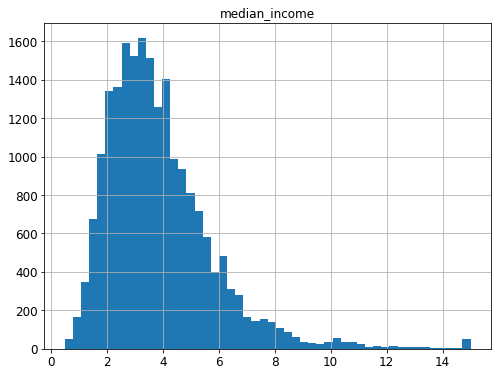

In [357]:
#Median Income appears to be a very important feature
#We are going to create income categories and stratify split the dataset based on those categories
housing.hist('median_income',bins = 50, figsize=(8,6))
plt.show()

<AxesSubplot:>

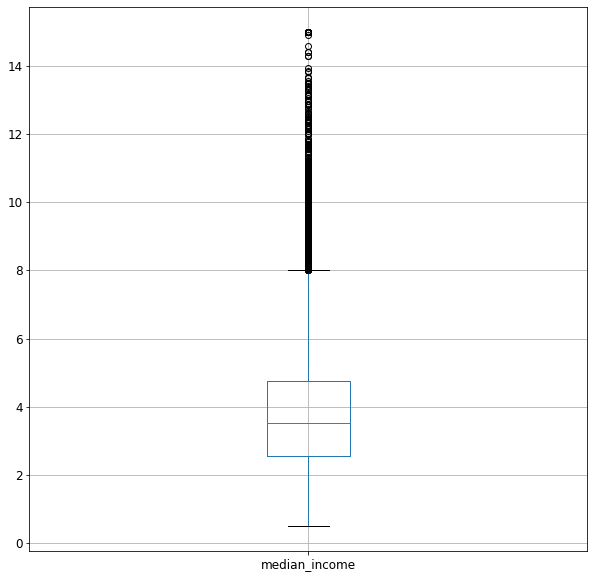

In [358]:
housing.boxplot('median_income', figsize=(10,10))

In [359]:
#Cutting to create categories
# bins = [0., 2.2, 3.8, 5, 8., 12., 14., np.inf]
#min, 25%, 50%, 75%, max, outliers ....
bins = [0., 2.5, 3.5, 4.7, 8, np.inf]
housing['income_cat'] = pd.cut(housing["median_income"], bins = bins, labels = range(len(bins)-1)) 

<AxesSubplot:>

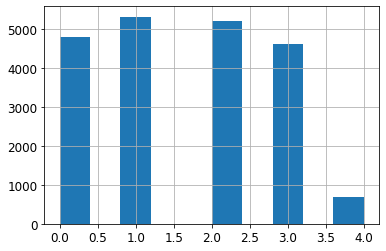

In [360]:
housing["income_cat"].hist()

Stratified Spliting

In [361]:
sss = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state= 42)
for train_index, test_index in sss.split(housing, housing['income_cat']):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

print(train_set["income_cat"].value_counts()/len(train_set))
print(test_set["income_cat"].value_counts()/len(test_set))

#We do not need the income_cat anymore, it was only used to stratifysplit so we can remove it
for dataset in [train_set, test_set]:
    dataset.drop('income_cat', axis=1, inplace=True)

train_set.head()

1    0.257631
2    0.252422
0    0.232800
3    0.223716
4    0.033430
Name: income_cat, dtype: float64
1    0.257752
2    0.252422
0    0.232800
3    0.223595
4    0.033430
Name: income_cat, dtype: float64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12040,-117.48,33.89,14.0,10395.0,1799.0,6295.0,1855.0,4.7295,149900.0,INLAND
15822,-122.42,37.75,52.0,801.0,272.0,639.0,259.0,2.1971,275000.0,NEAR BAY
5850,-118.32,34.18,49.0,192.0,41.0,83.0,38.0,3.0179,118800.0,<1H OCEAN
3113,-117.66,35.62,11.0,5897.0,1138.0,2728.0,1072.0,4.1500,85700.0,INLAND
13307,-117.62,34.08,24.0,2801.0,554.0,2064.0,529.0,4.4946,136000.0,INLAND


Correlations and feature engineering

In [362]:
#We are going to leave the test set alone for now and make a copy of the new trainset
housing = train_set.copy()
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12040,-117.48,33.89,14.0,10395.0,1799.0,6295.0,1855.0,4.7295,149900.0,INLAND


<AxesSubplot:>

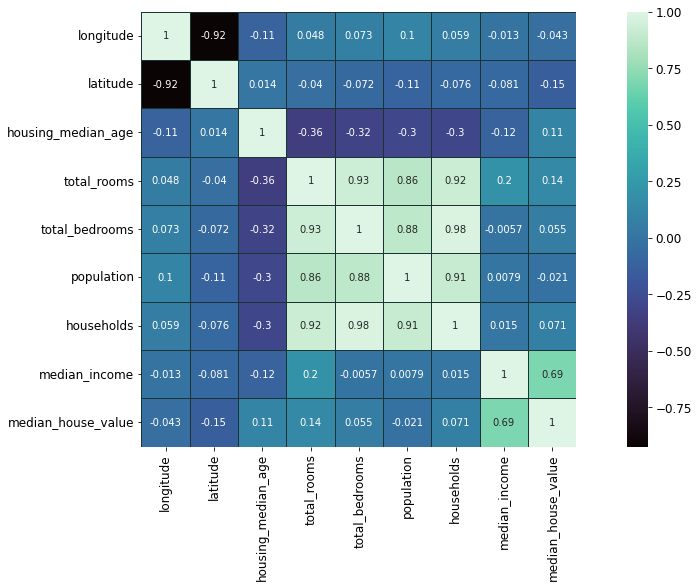

In [363]:
corr_matrix = housing.corr()
fig,ax = plt.subplots(1,1,figsize=(18,8))
sns.heatmap(corr_matrix, cmap="mako", square=True, annot= True, linewidths=1,linecolor=(0.1,0.2,0.2), ax = ax)


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

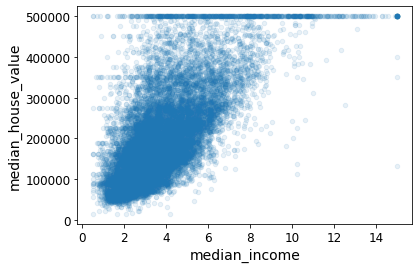

In [364]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha = 0.1)

There appear to be caps at approximately 500k, 450k, 350k, and 200k ish, sign of poor data, we might have to drop some of these caps

In [365]:
#Lets take a look at those, 762 appear to be at the max value cap which is 500,001
#We should probably remove these outliers
housing.loc[housing.median_house_value >= 500001].count()

longitude             762
latitude              762
housing_median_age    762
total_rooms           762
total_bedrooms        758
population            762
households            762
median_income         762
median_house_value    762
ocean_proximity       762
dtype: int64

Lets try to find and create some useful features

In [366]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686814
total_rooms           0.137268
housing_median_age    0.107935
households            0.071038
total_bedrooms        0.055152
population           -0.020526
longitude            -0.042714
latitude             -0.148492
Name: median_house_value, dtype: float64

In [367]:
#Median income is dropped from the feature generation as it is already veeeery correlated to house value
insigfeatures = ["ocean_proximity", "longitude", "latitude", "median_house_value", "median_income"]
features = [feature for feature in list(housing.columns) if feature not in insigfeatures]
for feature1 in features:
    for feature2 in features:
        if feature1 != feature2:
            housing[f'{feature1}_per_{feature2}'] = housing[feature1]/housing[feature2]

In [368]:
corr_matrix = housing.corr()
importantMatrix = corr_matrix["median_house_value"].sort_values(ascending=False)
importantMatrix.where(abs(importantMatrix) > 0.2).dropna()


median_house_value                1.000000
median_income                     0.686814
total_rooms_per_total_bedrooms    0.380568
households_per_population         0.262637
households_per_total_rooms       -0.209017
total_bedrooms_per_total_rooms   -0.249738
Name: median_house_value, dtype: float64

We can see that the most influential new features lets try making a transformer that creates these features for us

In [369]:
housing = train_set.copy()
housing = housing.drop("median_house_value", axis = 1)
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12040,-117.48,33.89,14.0,10395.0,1799.0,6295.0,1855.0,4.7295,INLAND
15822,-122.42,37.75,52.0,801.0,272.0,639.0,259.0,2.1971,NEAR BAY
5850,-118.32,34.18,49.0,192.0,41.0,83.0,38.0,3.0179,<1H OCEAN


In [370]:
from sklearn.base import BaseEstimator, TransformerMixin
#We want [total_rooms per total bedrooms] and [households per population] and [households per total rooms]

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_rooms_per_bedrooms=True, add_households_per_population=True, add_households_per_total_rooms=True, switch= False):
        self.add_rooms_per_bedrooms = add_rooms_per_bedrooms
        self.add_households_per_population = add_households_per_population
        self.add_households_per_total_rooms = add_households_per_total_rooms
        self.switch = switch

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.switch:
            if self.add_rooms_per_bedrooms:
                rooms_per_bedrooms = X[:, bedrooms_ix] / X[:, rooms_ix]
                X = np.c_[X, rooms_per_bedrooms]

            if self.add_households_per_population:
                households_per_population =  X[:, population_ix] / X[:, households_ix]
                X = np.c_[X, households_per_population]

            if self.add_households_per_total_rooms:
                households_per_rooms = X[:, rooms_ix] / X[:, households_ix]
                X = np.c_[X, households_per_rooms]
        
        else:
            if self.add_rooms_per_bedrooms:
                rooms_per_bedrooms = X[:, rooms_ix] / X[:, bedrooms_ix]
                X = np.c_[X, rooms_per_bedrooms]

            if self.add_households_per_population:
                households_per_population = X[:,
                                          households_ix] / X[:, population_ix]
                X = np.c_[X, households_per_population]

            if self.add_households_per_total_rooms:
                households_per_rooms = X[:, households_ix] / X[:, rooms_ix]
                X = np.c_[X, households_per_rooms]

        return X

In [371]:
#Looks good so far, lets build the pipeline !
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

housing_num = housing.drop('ocean_proximity', axis = 1)

X_train = train_set.copy().drop('median_house_value', axis = 1)
X_test = test_set.copy().drop('median_house_value', axis = 1)
y_train = train_set.copy()['median_house_value']
y_test = test_set.copy()['median_house_value']



num_attribs = list(housing_num)

cat_attribs = ['ocean_proximity']

num_transformer = Pipeline([('imputer', SimpleImputer(strategy="median")),
                            ('attribs_adder', CombinedAttributesAdder()),
                            ('std_scaler', StandardScaler()),
                            ])

preprocessor = ColumnTransformer([('num', num_transformer, num_attribs),
                                  ('cat', OneHotEncoder(), cat_attribs)])

X_train = preprocessor.fit_transform(X_train)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

X_train

array([[ 1.04497936, -0.81768866, -1.15714592, ...,  0.        ,
         0.        ,  0.        ],
       [-1.4202229 ,  0.98835271,  1.85648135, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.62579517, -0.68200162,  1.61856341, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.93519302, -0.76622116, -1.07783994, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.70868765, -0.70071707, -0.839922  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.74556208, -0.82236753,  0.11174977, ...,  0.        ,
         0.        ,  0.        ]])

Looks like the best model so far is the RandomForestRegressor, lets fine tune this model

In [372]:
from joblib import parallel_backend

# param_grid = {'n_estimators': np.arange(1, 100, 10), 'max_features': np.arange(1,10, 2), 'bootstrap': [True, False, None], 'max_depth': np.arange(10,200,50), 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12]}
param_grid = {'bootstrap': [False], 'max_depth': [32], 'max_features': [5], 'n_estimators': [700], 'min_samples_leaf': [3], 'min_samples_split': [8]}

rf_reg = RandomForestRegressor(random_state= 42)

with parallel_backend('threading', n_jobs = 2):
    grid_search = GridSearchCV(rf_reg, param_grid, cv=2, scoring= 'neg_mean_squared_error', return_train_score=True, verbose= 10, n_jobs= 2)
    grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2; 1/1] START bootstrap=False, max_depth=32, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=700
[CV 2/2; 1/1] START bootstrap=False, max_depth=32, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=700
[CV 2/2; 1/1] END bootstrap=False, max_depth=32, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=700;, score=(train=-414399790.021, test=-2552070367.375) total time=  19.3s
[CV 1/2; 1/1] END bootstrap=False, max_depth=32, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=700;, score=(train=-443876437.652, test=-2407875871.562) total time=  19.6s


In [373]:
grid_search.best_params_
#{'bootstrap': False,'max_depth': 32,'max_features': 5,'min_samples_leaf': 3,'min_samples_split': 8,'n_estimators': 700} 48714.36176501067
#{'bootstrap': False, 'max_depth': 16, 'max_features': 6, 'n_estimators': 400}
#{'bootstrap': False, 'max_depth': 30, 'max_features': 6, 'n_estimators': 500} 48887.59432926693
#{'bootstrap': False, 'max_depth': 32, 'max_features': 5, 'n_estimators': 600} 48842.78551794277
#{'bootstrap': False, 'max_depth': 32, 'max_features': 5, 'n_estimators': 700} 48799.66047929271
#{'n_estimators': 900,'min_samples_split': 3,'min_samples_leaf': 1,'max_features': 5,'max_depth': 45,'bootstrap': False} 48811.34421225845

{'bootstrap': False,
 'max_depth': 32,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 700}

In [374]:
np.sqrt(-grid_search.best_score_)

49799.32850419598

In [375]:
feature_importance = grid_search.best_estimator_.feature_importances_
extra_attribs = ['rooms_per_bedrooms', 'households_per_population', 'households_per_room']
cat_encoder = preprocessor.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attribs = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attribs), reverse = True)

[(0.32362103873292747, 'median_income'),
 (0.15694560037775462, 'INLAND'),
 (0.1038599845322387, 'households_per_population'),
 (0.08372448506915313, 'longitude'),
 (0.0771835272032578, 'latitude'),
 (0.0769156488639142, 'rooms_per_bedrooms'),
 (0.06349822832124681, 'households_per_room'),
 (0.036913243294414866, 'housing_median_age'),
 (0.015622761828615968, '<1H OCEAN'),
 (0.013727028031093142, 'total_rooms'),
 (0.012978217286034325, 'population'),
 (0.012092510583399458, 'total_bedrooms'),
 (0.011396138170543746, 'households'),
 (0.006979032946089637, 'NEAR OCEAN'),
 (0.004473214162618283, 'NEAR BAY'),
 (6.934059669778684e-05, 'ISLAND')]

Ok, now that we have a lot of information let us start over and try to remove some outliers and perhaps drop the missing values as well

In [376]:
housing_train = train_set.copy()
housing_test = test_set.copy()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

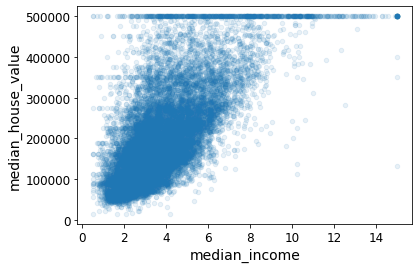

In [377]:
housing_train.plot(kind="scatter", x="median_income", y="median_house_value", alpha = 0.1)

Removing outliers at 500,001

In [378]:
class DataCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, drop_nulls = True, drop_outliers = True):
        self.dropnulls = drop_nulls
        self.dropouts = drop_outliers

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.dropnulls:
            X = X.dropna()

        if self.dropouts:
            X = X.loc[(X.median_house_value != 500001)]

        return X

In [379]:
#Lets look at some missing data
df_nullinfos = pd.DataFrame({'missing': housing_train.isnull().sum(), 'percent': housing_train.isnull().mean().round(5) * 100})
df_nullinfos

,missing,percent
longitude,0,0.000
latitude,0,0.000
housing_median_age,0,0.000
total_rooms,0,0.000
total_bedrooms,162,0.981
population,0,0.000
households,0,0.000
median_income,0,0.000
median_house_value,0,0.000
ocean_proximity,0,0.000


In [380]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])


class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k = 5):
        self.feature_importances = feature_importances
        self.k = k

    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(
            self.feature_importances, self.k)
        return self

    def transform(self, X):
        return X[:, self.feature_indices_]

Build a new pipeline


In [744]:
X = train_set.copy()
cleaner = DataCleaner(True, True)
X = cleaner.fit_transform(X)

X_train = X.drop('median_house_value', axis = 1)
y_train =  X['median_house_value']

X = test_set.copy()
X = cleaner.fit_transform(X)

X_test = X.drop('median_house_value', axis = 1)
y_test =  X['median_house_value']

# X_test = test_set.copy().drop('median_house_value', axis = 1)
# y_test = test_set.copy()['median_house_value']

num_attribs = list(X_train)[: -1]
cat_attribs = ['ocean_proximity']

model = grid_search.best_estimator_
model = RandomForestRegressor(bootstrap = False, max_features=3, n_estimators=311, random_state= 42, min_samples_leaf = 3, min_samples_split = 6, max_depth = 35)

num_transformer = Pipeline([('imputer', SimpleImputer(missing_values = np.NaN, strategy="median")),
                            ('attribs_adder', CombinedAttributesAdder(False, True, True, switch= True)),
                            ('std_scaler', StandardScaler()),
                            ])

preprocessor = ColumnTransformer([('num', num_transformer, num_attribs),
                                  ('cat', OneHotEncoder(), cat_attribs)])

full_pipeline = Pipeline([('prep', preprocessor),
                          ('feature_selector', TopFeatureSelector(feature_importance, k = 8)) ,
                          ('clf', model)])


full_pipeline.fit(X_train, y_train)
final_predictions = full_pipeline.predict(X_test)
full_pipeline.score(X_test, y_test)


0.8047705241042753

In [745]:
from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse
#43296.92550180643

43429.20941099442